In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import FinanceDataReader as fdr

import matplotlib.pyplot as plt 
import seaborn as sns    

ModuleNotFoundError: No module named 'numpy'

In [2]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime.today()

finance = {"kospi":"KS11", "kosdaq":"KQ11", "sp500":"143850", "euro":"195930", "nikkei":"241180", "sanghai":"283580", "fund_10":"152380", "kbstar" : "136340", "fund_us":"308620", "gold":"132030", "wti":"261220","k_inverse":"114800", "d_inverse":"261270"}

for i in finance.keys():
    globals()['{}'.format(i)] = fdr.DataReader(finance[i],start,end)

df_list = [globals()['{}'.format(i)]['Close'] for i in finance.keys()]

In [3]:
stock = pd.concat(df_list, axis=1)
stock.columns = finance.keys()
stock_corr = stock.corr()

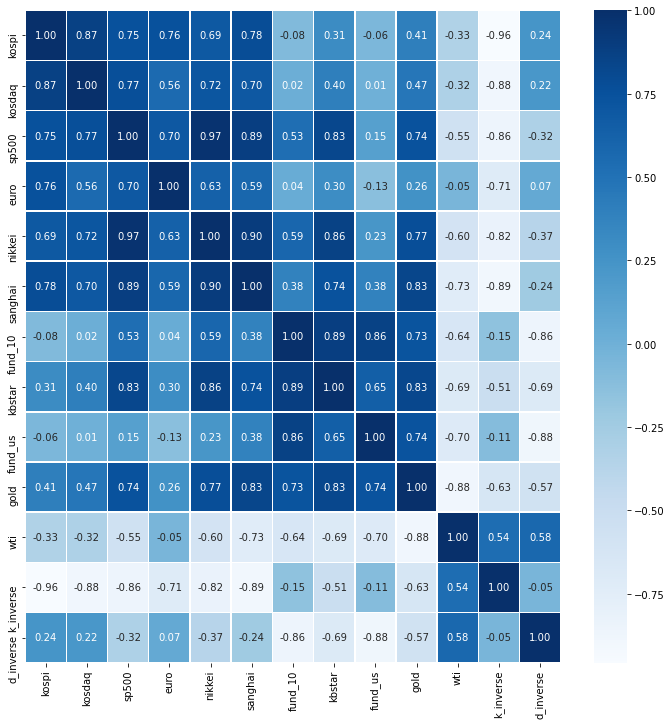

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(data = stock_corr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
cor_list = list(stock_corr['k_inverse'])

In [7]:
def weight(x):
    wp = []
    for i in x:
        wp.append(100*(1-i)/(sum([1-j for j in x])))

    col = stock_corr.columns
    df = pd.DataFrame(wp, col, columns=["weight"])
    
    return df

In [9]:
weight(cor_list)

,weight
kospi,10.929907
kosdaq,10.893781
sp500,10.812385
euro,9.969899
nikkei,10.864034
sanghai,10.668623
fund_10,1.760970
kbstar,10.539907
fund_us,1.307347
gold,7.117233


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
def get_coef(df):
    s_cols = list(df.columns)
    coef = []
    for i in range(len(s_cols)):
        X_data = df[df.columns.difference([s_cols[i]])]
        y_data = df[s_cols[i]]
        X_data.fillna(X_data.mean(), inplace=True)
        y_data.fillna(y_data.mean(), inplace=True)

        model = LinearRegression()
        model.fit(X_data, y_data)
        c = model.coef_
        c = np.insert(c, i, 0)
        coef.append(c)

    coef_df = pd.DataFrame(coef, columns = s_cols, index = s_cols)
    return coef_df

In [13]:
stock_coef = get_coef(stock)

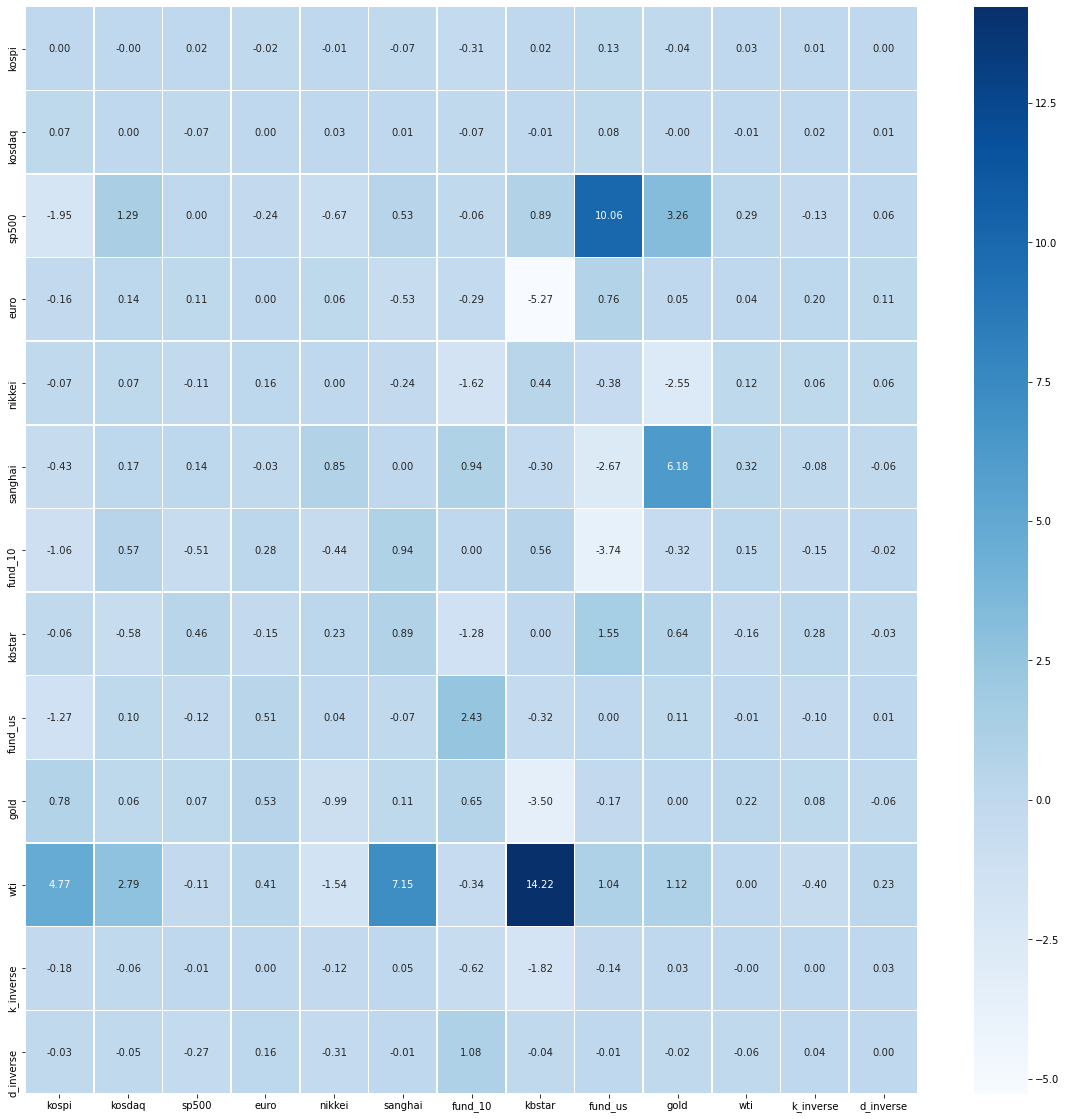

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data = stock_coef, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [16]:
! pip install statsmodels

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [18]:
kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-02,2026.16,2022.23,2031.79,2015.68,229880000.0,-0.0001
2017-01-03,2043.97,2034.31,2044.07,2028.47,268130000.0,0.0088
2017-01-04,2045.64,2046.29,2046.29,2040.61,371490000.0,0.0008
2017-01-05,2041.95,2045.52,2046.50,2039.49,541340000.0,-0.0018
2017-01-06,2049.12,2048.11,2051.84,2045.66,455350000.0,0.0035
...,...,...,...,...,...,...
2021-08-02,3223.04,3218.42,3223.04,3194.00,561000000.0,0.0065
2021-08-03,3237.14,3221.57,3237.14,3213.20,653510000.0,0.0044
2021-08-04,3280.38,3246.65,3283.14,3237.55,632240000.0,0.0134


In [19]:
adfuller_test = adfuller(kospi['Close'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -0.19588973903015233
p-value: 0.9390097794552414


In [20]:
adfuller_test = adfuller(kospi['Close'].diff().dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -21.098077543234922
p-value: 0.0


In [21]:
adfuller_test = adfuller(kospi['Volume'].diff().dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -12.094610860142478
p-value: 2.0844962752259112e-22


In [22]:
model = VAR(kospi.diff(1).dropna())

C:\Users\김태일\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
results = model.fit(1)

In [24]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Aug, 2021
Time:                     21:09:40
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    47.1187
Nobs:                     1129.00    HQIC:                   47.0023
Log likelihood:          -36062.8    FPE:                2.41065e+20
AIC:                      46.9316    Det(Omega_mle):     2.32288e+20
--------------------------------------------------------------------
Results for equation Close
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.922081         0.723464            1.275           0.202
L1.Close          0.015581         0.076115            0.205           0.838
L1.Open          -0.086514         0.058302           -1.484           0.138

In [25]:
def arima(df):
    from statsmodels.tsa.arima_model import ARIMA
    import statsmodels.api as sm
    model = ARIMA(df['Close'], order=(2,1,2))
    model_fit = model.fit(trend='nc')
    fore = model_fit.forecast(steps=10)
    forecast = pd.DataFrame(fore[0], columns=['df'])
    return forecast

In [26]:
arima(sp500)

C:\Users\김태일\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\김태일\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,df
0,51610.702227
1,51628.971030
2,51684.335313
3,51669.858789
4,51622.212753
5,51633.606044
6,51674.587765
7,51665.693172
8,51630.462363
9,51637.339222


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, TimeDistributed, RepeatVector, Dropout, Bidirectional, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import tempfile
import time
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
kospi.corr()['Close']

Close     1.000000
Open      0.998372
High      0.999106
Low       0.999346
Volume    0.550523
Change    0.054682
Name: Close, dtype: float64

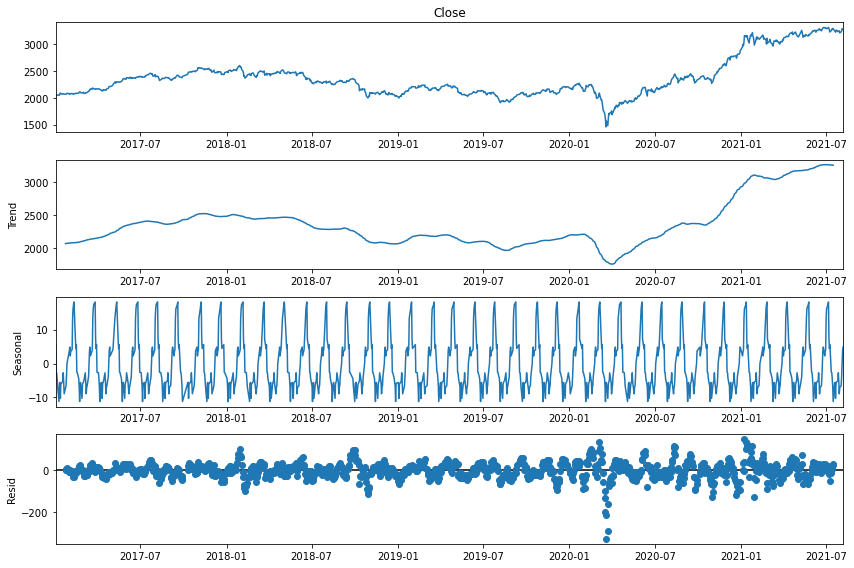

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [12, 8]
seasonal_decompose(kospi['Close'], model='additive', period = 30).plot()
plt.show()

In [30]:
kospi.corr()

,Close,Open,High,Low,Volume,Change
Close,1.000000,0.998372,0.999106,0.999346,0.550523,0.054682
Open,0.998372,1.000000,0.999351,0.999082,0.550663,0.010115
High,0.999106,0.999351,1.000000,0.998855,0.559046,0.026652
Low,0.999346,0.999082,0.998855,1.000000,0.541718,0.035847
Volume,0.550523,0.550663,0.559046,0.541718,1.000000,0.020158
Change,0.054682,0.010115,0.026652,0.035847,0.020158,1.000000


In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [32]:
kospi_df = kospi.iloc[:,:4]

In [34]:
split_date = int(kospi_df.shape[0]*0.8)
train = kospi_df[:split_date]
test = kospi_df[split_date:]

#TempAvgF scale
scaler = MinMaxScaler()
train_scale = pd.DataFrame(scaler.fit_transform(train), columns=kospi_df.columns) 
test_scale = pd.DataFrame(scaler.transform(test), columns=kospi_df.columns)
# We should use transform in TEST data. If we use fit_transform, model learns test data too.

train_feature = train_scale[train_scale.columns.difference(['Close'])]
train_label = train_scale[['Close']]
test_feature = test_scale[test_scale.columns.difference(['Close'])]
test_label = test_scale[['Close']]

# Split data each Timesteps
def make_dataset(data, label, window_size, predict_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size-predict_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size:i+window_size+predict_size]))
    return np.array(feature_list), np.array(label_list)

timeseteps = 30
predict_size = 5

train_feature, train_label = make_dataset(train_feature, train_label, timeseteps, predict_size)
test_feature, test_label = make_dataset(test_feature, test_label, timeseteps, predict_size)

train_label = train_label.reshape(train_label.shape[0],train_label.shape[1])
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])

In [35]:
from attention import Attention

def setup_model(n, lr):
    model = Sequential()
    model.add(GRU(n,activation='relu',return_sequences=True,input_shape=(train_feature.shape[1],train_feature.shape[2])))
    model.add(GRU(n,activation='relu'))
    Attention()
    model.add(Dense(predict_size, activation='linear'))
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

    return model

model = setup_model(n=64, lr=0.005)
batch_size = 10

model.fit(train_feature, train_label,batch_size=batch_size,epochs=100,validation_split=0.2, verbose=0)

print(model.evaluate(test_feature, test_label))

predict = model.predict(test_feature)
predict = predict.reshape(predict.shape[0],predict.shape[1])
print("rmse: {}".format(np.sqrt(mean_squared_error(test_label, predict))))
print('r2: {}'.format(r2_score(test_label, predict)))

ModuleNotFoundError: No module named 'attention'

<AxesSubplot:>

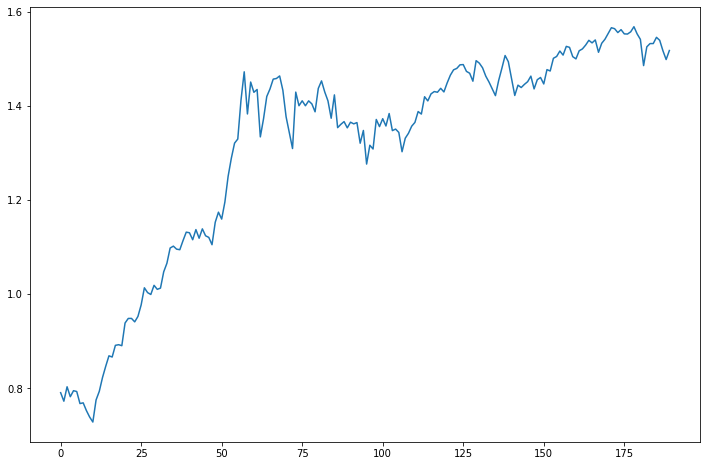

In [111]:
pd.DataFrame(predict).iloc[:,4].plot()

In [114]:
kospi['indicator'] = kospi['Volume']*kospi['Change']
kospi_df = kospi
split_date = int(kospi_df.shape[0]*0.8)
train = kospi_df[:split_date]
test = kospi_df[split_date:]

#TempAvgF scale
scaler = MinMaxScaler()
train_scale = pd.DataFrame(scaler.fit_transform(train), columns=kospi_df.columns) 
test_scale = pd.DataFrame(scaler.transform(test), columns=kospi_df.columns)
# We should use transform in TEST data. If we use fit_transform, model learns test data too.

train_feature = train_scale[['Volume', 'Change']]
train_label = train_scale[['indicator']]
test_feature = test_scale[['Volume', 'Change']]
test_label = test_scale[['indicator']]


timeseteps = 30
predict_size = 5

train_feature, train_label = make_dataset(train_feature, train_label, timeseteps, predict_size)
test_feature, test_label = make_dataset(test_feature, test_label, timeseteps, predict_size)

train_label = train_label.reshape(train_label.shape[0],train_label.shape[1])
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])

In [115]:
def setup_model(n, lr):
    model = Sequential()
    model.add(GRU(n,activation='relu',return_sequences=True,input_shape=(train_feature.shape[1],train_feature.shape[2])))
    model.add(GRU(n,activation='relu'))
    Attention()
    model.add(Dense(predict_size, activation='linear'))
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

    return model

model = setup_model(n=32, lr=0.005)
batch_size = 10

model.fit(train_feature, train_label,batch_size=batch_size,epochs=100,validation_split=0.2, verbose=0)

print(model.evaluate(test_feature, test_label))

predict = model.predict(test_feature)
predict = predict.reshape(predict.shape[0],predict.shape[1])
print("rmse: {}".format(np.sqrt(mean_squared_error(test_label, predict))))
print('r2: {}'.format(r2_score(test_label, predict)))

6/6 [==============================] - 0s 2ms/step - loss: 0.0107
0.010741448029875755
rmse: 0.10364095935151693
r2: -0.09154545722119037
